# Assignment# 01: EDA

# Flight Price Prediction

Sastaticket has provided a train/test dataset. This synthetic dataset contains records which act as search data. For example, if someone was to come on to Sastaticket’s website and search for a flight, this data would be recorded.

Dataset includes the following features:
- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number
- Target

# Preprocessing of Data before EDA

In [100]:
!pip install gdown

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [102]:
dataset = '1gTk9mxk2Yi1PC9bf7VvXaf6nIoVFNiBt'
url = f'https://drive.google.com/uc?id={dataset}'

output_path = '/content/dataset.csv'
gdown.download(url, output_path, quiet=False)

df = pd.read_csv(output_path)

Downloading...
From: https://drive.google.com/uc?id=1gTk9mxk2Yi1PC9bf7VvXaf6nIoVFNiBt
To: /content/dataset.csv
100%|██████████| 724k/724k [00:00<00:00, 105MB/s]


In [103]:
df.shape

(5000, 14)

In [104]:
## print shape of dataset with  rows and columns
print(df.shape)

(5000, 14)


In [105]:
## print the top5 records
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [106]:
# Rename multiple columns
df.rename(columns={'Unnamed: 0': 'Id', 'f1': 'PurchaseDateTime', 'f2': 'Origin', 'f3': 'Destination', 'f4': 'DepartureDateTime', 'f5': 'ArrivalDateTime', 'f6': 'Airline', 'f7': 'RefundableTicket', 'f8': 'BaggageWeight', 'f9': 'BaggagePieces', 'f10': 'FlightNumber', 'target': 'Target'}, inplace=True)
df.head()

,Unnamed: 0.2,Id,PurchaseDateTime,Origin,Destination,DepartureDateTime,ArrivalDateTime,Airline,RefundableTicket,BaggageWeight,BaggagePieces,FlightNumber,Unnamed: 0.1,Target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [107]:
#drop ids and duplicate columns
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0.2', 'Id'], axis=1)
df.head()

,PurchaseDateTime,Origin,Destination,DepartureDateTime,ArrivalDateTime,Airline,RefundableTicket,BaggageWeight,BaggagePieces,FlightNumber,Target
0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


# Required Tasks

In this assignment we will be performing following tasks:

1. Data Summarization
2. Data Visualization
3. Handling Missing Data
4. Outlier Detection and Treatment
5. Data Distribution Analysis
6. Bivariate Analysis (Any two)
7. Grouping and Aggregation
8. Data Transformation

## Task 1. Data Summarization:
* Count the frequency of unique values for categorical variables.
* Calculate the number of missing values for each variable.
* Calculate basic summary statistics (mean, median, standard deviation, etc.) for each numerical variable.

### Count the frequency of unique values for categorical variables.

In [108]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,RefundableTicket,BaggageWeight,BaggagePieces,Target
0,True,0.0,0,7400.0
1,True,35.0,1,15377.0
2,True,20.0,1,6900.0
3,True,15.0,1,9707.0
4,True,20.0,0,6500.0


In [109]:
# list of catagorical variables
catagorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of catagorical variables: ', len(catagorical_features))

# visualise the catagorical variables
df[catagorical_features].head()

Number of catagorical variables:  7


,PurchaseDateTime,Origin,Destination,DepartureDateTime,ArrivalDateTime,Airline,FlightNumber
0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,c-2
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,a-9
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,c-4
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,a-23
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,b-1


### Calculate the number of missing values for each variable.


In [110]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 2),  ' % missing values')

## 3- incase no missing values found
features_with_na=[features for features in df.columns if df[features].notnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].notnull().mean(), 2),  ' % no missing values')

PurchaseDateTime 1.0  % no missing values
Origin 1.0  % no missing values
Destination 1.0  % no missing values
DepartureDateTime 1.0  % no missing values
ArrivalDateTime 1.0  % no missing values
Airline 1.0  % no missing values
RefundableTicket 1.0  % no missing values
BaggageWeight 1.0  % no missing values
BaggagePieces 1.0  % no missing values
FlightNumber 1.0  % no missing values
Target 1.0  % no missing values


### Calculate basic summary statistics (mean, median, standard deviation, etc.) for each numerical variable.



In [111]:
df.describe()

,BaggageWeight,BaggagePieces,Target
count,5000.000000,5000.000000,5000.000000
mean,22.494400,0.944600,10104.351800
std,8.887101,0.607951,3359.936118
min,0.000000,0.000000,4990.000000
25%,20.000000,1.000000,7796.000000
50%,20.000000,1.000000,9403.000000
75%,32.000000,1.000000,11245.000000
max,45.000000,2.000000,33720.000000


### Summary:
Data has id column that was not relevant and some duplicate columns so removed them and renamed columns with specific title.

Data has 4 numerical and 7 catagorical variables and no missing values.

Calculated basic summary statistics of numerical variables.

## Task 2. Data Visualization:
* Create histograms or density plots to visualize the distribution of numerical
variables.
* Generate bar plots or pie charts to visualize the distribution of categorical variables.
* Create box plots to identify outliers and understand the spread of data.
* Construct scatter plots to explore relationships between pairs of variables.
* Use heatmaps to visualize correlations between variables.

### Create histograms or density plots to visualize the distribution of numerical variables.

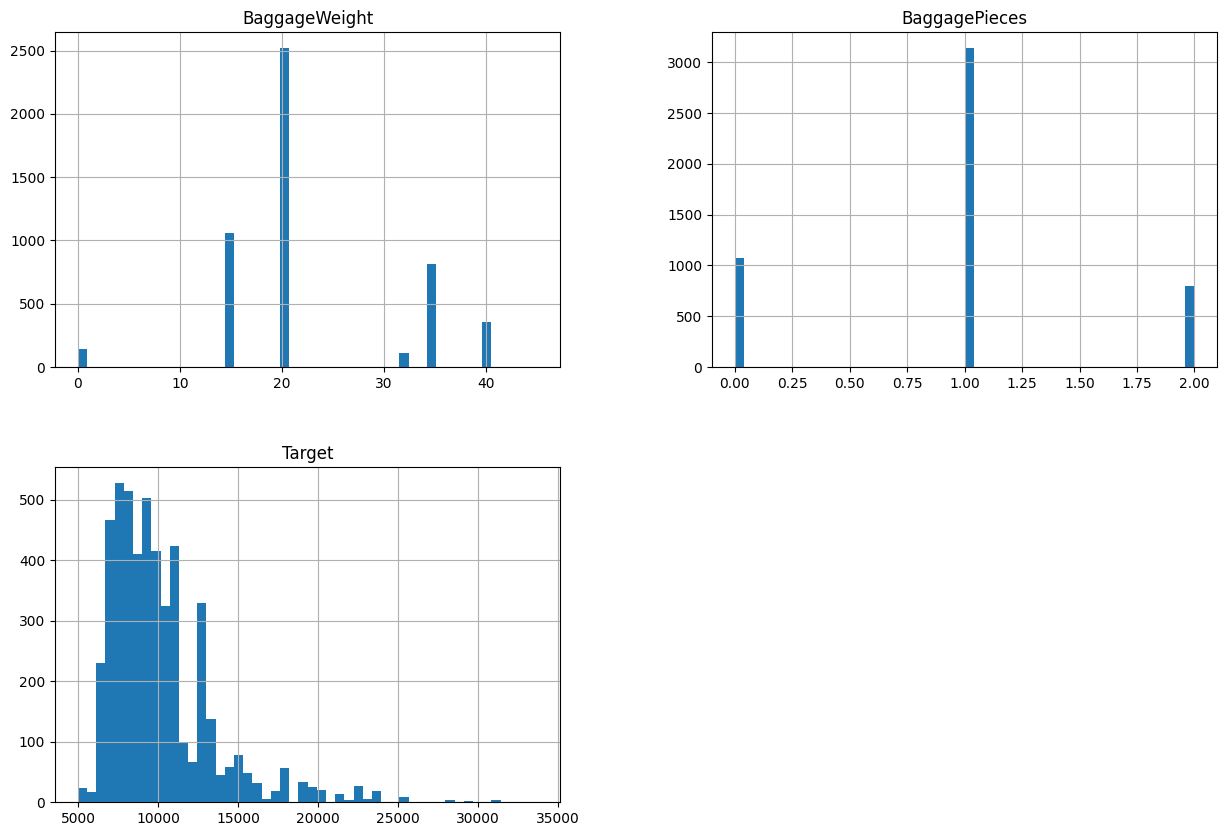

In [112]:
# Plotting the data
df.hist(bins=50, figsize=(15, 10))
plt.show()

<ipython-input-113-d4e2dd8f774b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-113-d4e2dd8f774b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-113-d4e2dd8f774b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

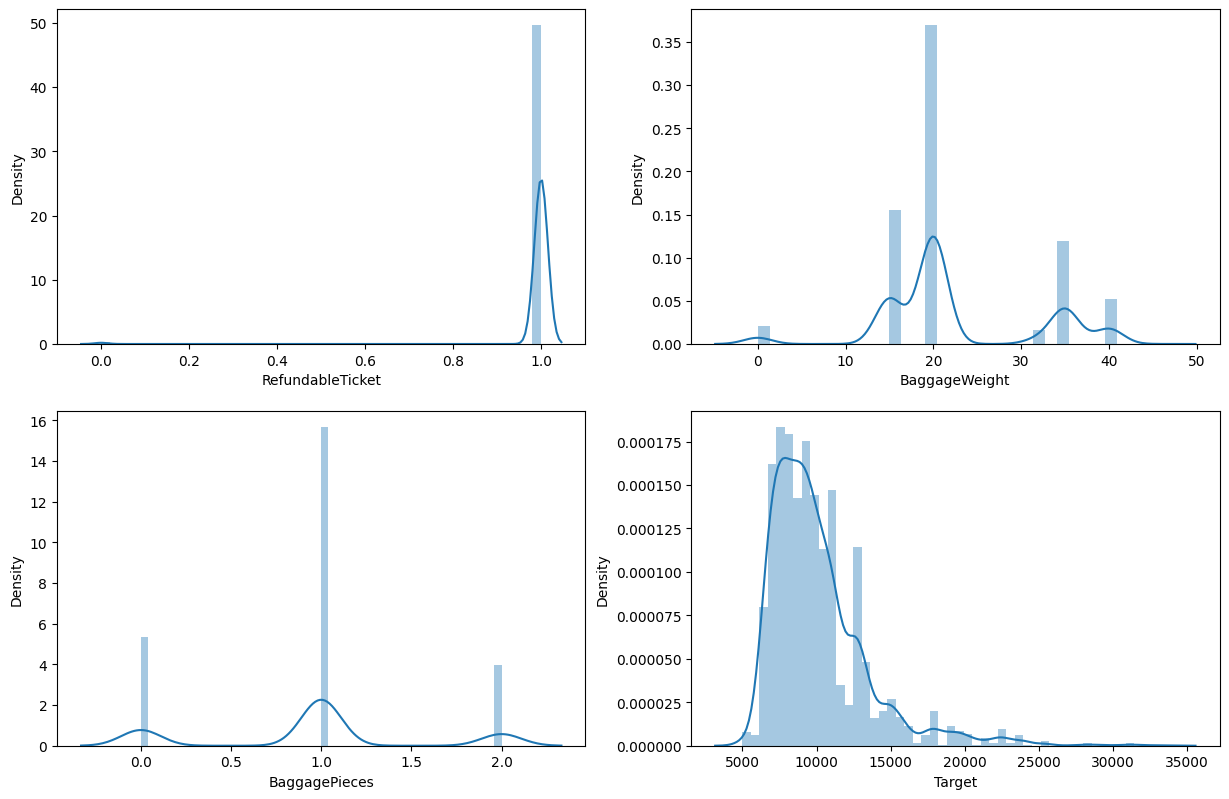

In [113]:
# Plotting numerical columns

c = 1
plt.figure(figsize=(15, 20))

for i in numerical_features:
    plt.subplot(4, 2, c)
    sns.distplot(df[i])
    c = c + 1

plt.show()


### Generate bar plots or pie charts to visualize the distribution of categorical variables.

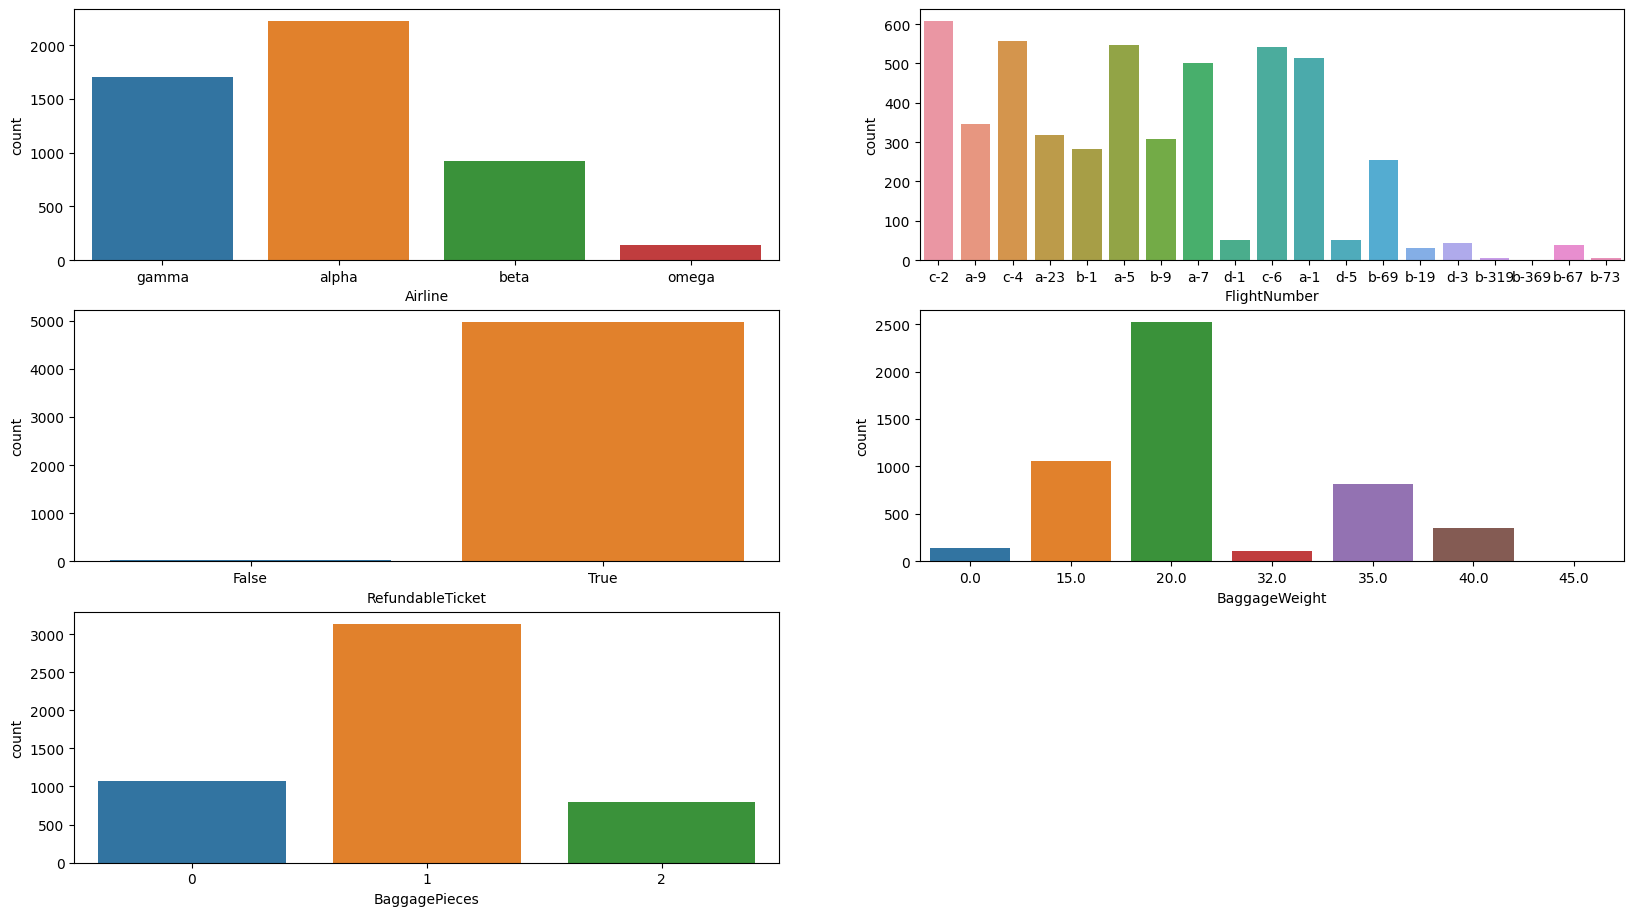

In [114]:
x = ["Airline", "FlightNumber", "RefundableTicket", "BaggageWeight", "BaggagePieces", ]
c = 1
plt.figure(figsize=(20, 15))

for i in x:
    plt.subplot(4, 2, c)
    sns.countplot(x=df[i])
    c = c + 1

plt.show()

### Create box plots to identify outliers and understand the spread of data.

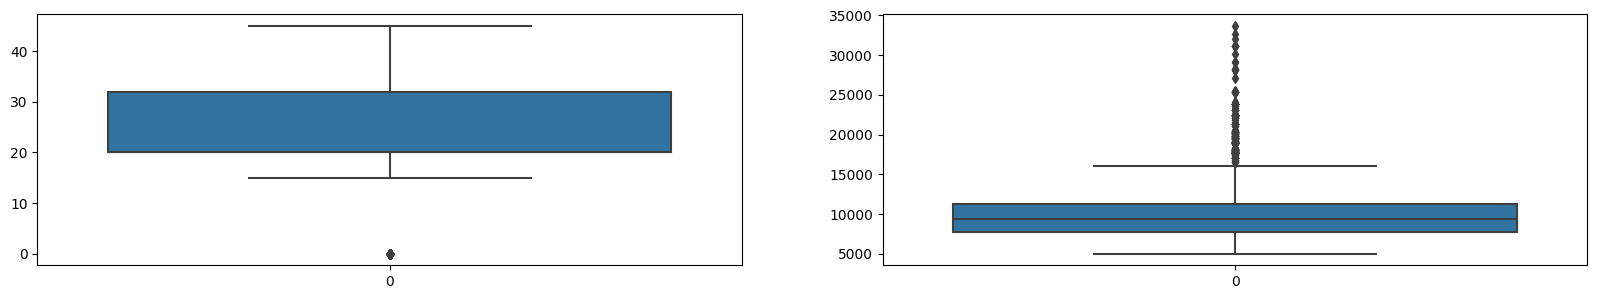

In [115]:
outliers = ["BaggageWeight", "Target"]
c = 1
plt.figure(figsize=(20, 15))

for i in outliers:
    plt.subplot(4, 2, c)
    sns.boxplot(df[i])
    c = c + 1

plt.show()

In [116]:
 # Check Skew
df.skew()

<ipython-input-116-6ea9a1cd86c4>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


RefundableTicket   -11.660949
BaggageWeight        0.418300
BaggagePieces        0.027547
Target               2.056345
dtype: float64

In [117]:
# Check Kurtosis
df.kurtosis()

<ipython-input-117-067df0927188>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


RefundableTicket    134.031335
BaggageWeight         0.046374
BaggagePieces        -0.310364
Target                6.344666
dtype: float64

### Construct scatter plots to explore relationships between pairs of variables.

<Axes: xlabel='BaggageWeight', ylabel='Target'>

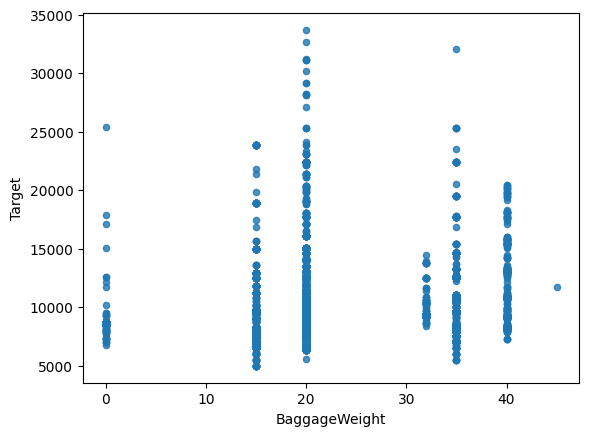

In [118]:
# Plotting the columns to understand Correlations
df.plot(kind="scatter" , x="BaggageWeight" , y="Target" , alpha=0.8)

<Axes: xlabel='BaggageWeight', ylabel='BaggagePieces'>

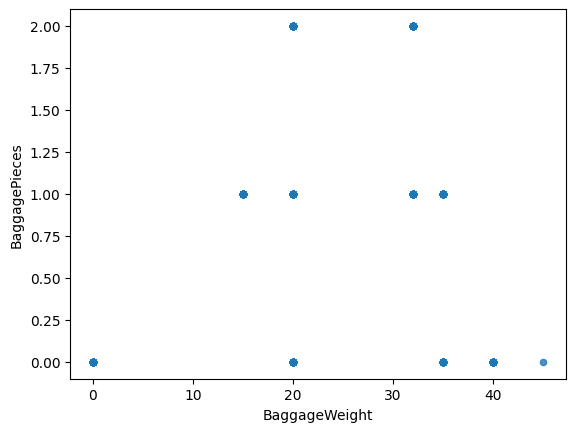

In [119]:
# plt.scatter(df["RefundableTicket"], df["Target"])
df.plot(kind="scatter" , x="BaggageWeight" , y="BaggagePieces" , alpha=0.8)

<Axes: xlabel='BaggagePieces', ylabel='Target'>

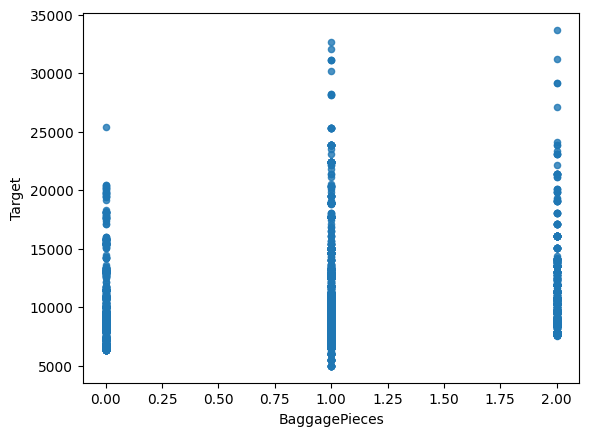

In [120]:
# plt.scatter(df["BaggagePieces"], df["Target"])
df.plot(kind="scatter" , x="BaggagePieces" , y="Target" , alpha=0.8)

### Summary:
Created histograms of numerical variables.

Target variable has some outliers.

Created scattered plots to understand variable relationships. Baggage pieces have very less impact on prices.

## Task 3. Handling Missing Data:
* Explore the patterns of missing data across variables.
* Decide on an appropriate strategy for handling missing values (imputation, removal, etc.).

In [121]:
df.isnull().sum()

PurchaseDateTime     0
Origin               0
Destination          0
DepartureDateTime    0
ArrivalDateTime      0
Airline              0
RefundableTicket     0
BaggageWeight        0
BaggagePieces        0
FlightNumber         0
Target               0
dtype: int64

### Summary:
No missing data found.

## Task 4. Outlier Detection and Treatment

### Identify and visualize outliers in numerical variables.

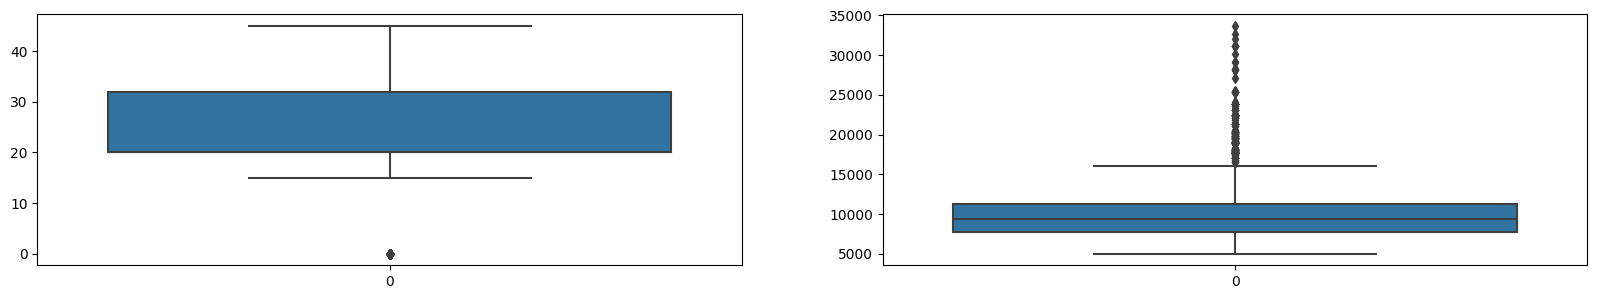

In [122]:
outliers = ["BaggageWeight", "Target"]
c = 1
plt.figure(figsize=(20, 15))

for i in outliers:
    plt.subplot(4, 2, c)
    sns.boxplot(df[i])
    c = c + 1

plt.show()

###  Decide whether to remove, transform, or treat outliers based on domain knowledge and analysis goals.

In [123]:
print("Old Shape: ", df["BaggageWeight"].shape)

# IQR
# Calculate the upper and lower limits
Q1 = df['BaggageWeight'].quantile(0.25)
Q3 = df['BaggageWeight'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['BaggageWeight']>=upper)[0]
lower_array = np.where(df['BaggageWeight']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df["BaggageWeight"].shape)

Old Shape:  (5000,)
New Shape:  (4855,)


### Summary:
Detected outlier in Target and Baggage Weight and dropped them.

## Task 5. Data Distribution Analysis:

### Visualize the data distribution and assess skewness and kurtosis.

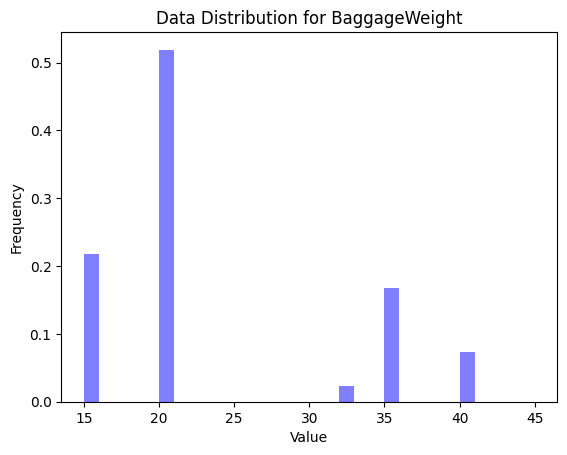

Skewness for BaggageWeight: 0.96
Kurtosis for BaggageWeight: -0.60


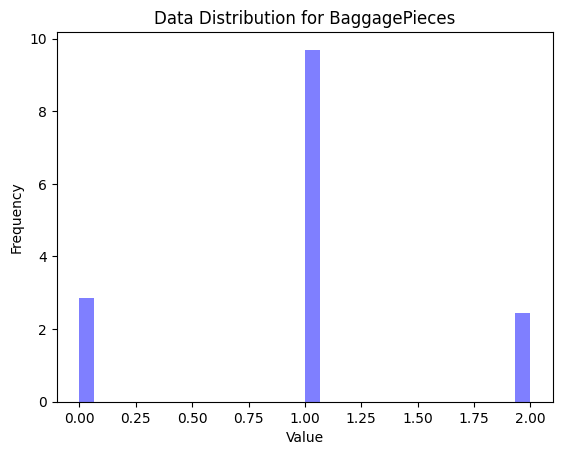

Skewness for BaggagePieces: 0.01
Kurtosis for BaggagePieces: -0.17


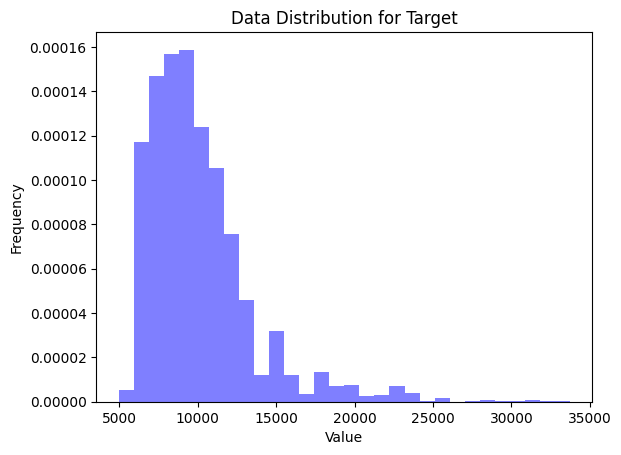

Skewness for Target: 2.02
Kurtosis for Target: 6.13


In [124]:
from scipy.stats import skew, kurtosis

# Get the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=[np.number])

# Loop through each numerical column and analyze its distribution
for column_name in numerical_columns.columns:
    data = df[column_name].dropna()  # Remove missing values if any

    # Visualize the data distribution using a histogram
    plt.hist(data, bins=30, density=True, alpha=0.5, color='b')
    plt.title(f"Data Distribution for {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

    # Calculate skewness and kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)

    print(f"Skewness for {column_name}: {skewness:.2f}")
    print(f"Kurtosis for {column_name}: {kurt:.2f}")

### Summary:
Skewness for BaggagePieces is 0.01 and Kurtosis is -0.17.

Skewness for Target is 2.02 and Kurtosis for Target is 6.13

## Task 6. Bivariate Analysis

### Analyze relationships between pairs of variables through scatter plots.

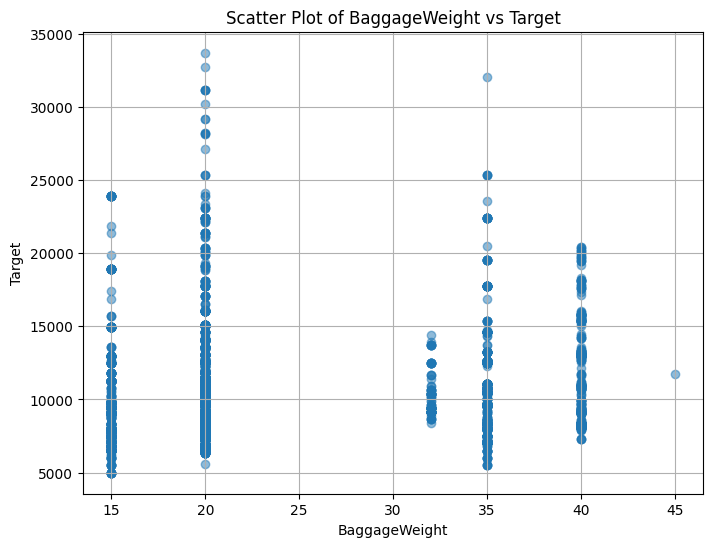

In [125]:
x_column = 'BaggageWeight'
y_column = 'Target'

plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

### Summary:
Baggage weight is impacting target as mostly for higher targets baggage weights are ideally to be lesser comparatively.

## Task 7. Grouping and Aggregation:

### Group data by categorical variables and calculate summary statistics within each group.

In [126]:
# Calculate summary statistics within each group
summary_statistics = df.groupby('Airline').agg(
    MeanBaggageWeight=('BaggageWeight', 'mean'),
    MeanBaggagePieces=('BaggagePieces', 'mean'),
    TotalFlights=('FlightNumber', 'count')
).reset_index()

# Display the summary statistics
print(summary_statistics)

  Airline  MeanBaggageWeight  MeanBaggagePieces  TotalFlights
0   alpha          22.924440           1.000000          2144
1    beta          28.400000           0.000000           925
2   gamma          20.811206           1.482948          1642
3   omega          20.000000           1.000000           144


### Explore differences or patterns between different groups.

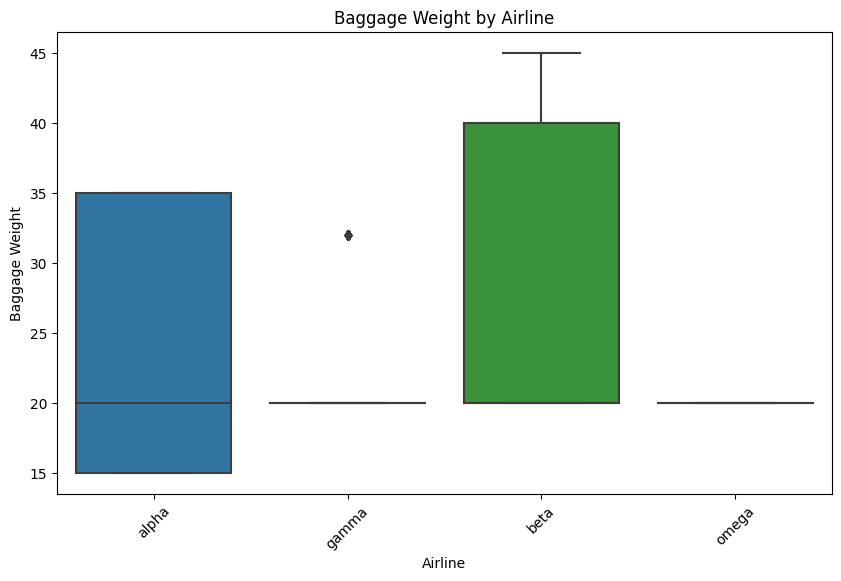

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='BaggageWeight', data=df)
plt.title('Baggage Weight by Airline')
plt.xlabel('Airline')
plt.ylabel('Baggage Weight')
plt.xticks(rotation=45)
plt.show()

### Summary:
Calculated baggage weights with respect to airlines and found that alpha has little lesser and beta has comparatively higher baggage weights allowed.

## Task 8. Data Transformation:

### Apply mathematical transformations (e.g., logarithmic or exponential transformations) to normalize data.

In [128]:
df['Log_BaggageWeight'] = np.log(df['BaggageWeight'])

In [129]:
df.head()

,PurchaseDateTime,Origin,Destination,DepartureDateTime,ArrivalDateTime,Airline,RefundableTicket,BaggageWeight,BaggagePieces,FlightNumber,Target,Log_BaggageWeight
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0,3.555348
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0,2.995732
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0,2.708050
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0,2.995732
5,2021-01-01 11:49:07.165618+00:00,x,y,2021-01-04 11:00:00+00:00,2021-01-04 13:00:00+00:00,gamma,True,32.0,1,c-4,9655.0,3.465736


In [130]:
# Will do typecasting

df["PurchaseDateTime"] = pd.to_datetime(df["PurchaseDateTime"])
df["DepartureDateTime"] = pd.to_datetime(df["DepartureDateTime"])
df["ArrivalDateTime"] = pd.to_datetime(df["ArrivalDateTime"])

# Adding column after subtraction to find time before departure

df.insert(0 , "time_to_depart(s)" , ((df["DepartureDateTime"] - df["PurchaseDateTime"]).astype("timedelta64[s]")) , True)
df.insert(1 , "time_travel(s)" , ((df["ArrivalDateTime"] - df["DepartureDateTime"]).astype("timedelta64[s]")) , True)

df.drop(["PurchaseDateTime" , "DepartureDateTime" , "ArrivalDateTime", "Origin", "Destination","FlightNumber","Log_BaggageWeight"] , axis=1 , inplace=True)

df.head()

,time_to_depart(s),time_travel(s),Airline,RefundableTicket,BaggageWeight,BaggagePieces,Target
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0
5,256252.0,7200.0,gamma,True,32.0,1,9655.0


### Convert categorical variables to numerical format using encoding techniques.

In [131]:
# Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Airline"] = le.fit_transform(df["Airline"])
df["RefundableTicket"] = le.fit_transform(df["RefundableTicket"])
df["BaggageWeight"] = le.fit_transform(df["BaggageWeight"])

In [132]:
df.sample(10)

,time_to_depart(s),time_travel(s),Airline,RefundableTicket,BaggageWeight,BaggagePieces,Target
161,1182282.0,7200.0,0,1,0,1,6810.0
3583,2689450.0,7200.0,0,1,0,1,9403.0
2819,2132700.0,7200.0,0,1,1,1,7524.0
470,518376.0,7200.0,0,1,0,1,12945.0
3159,1141049.0,7140.0,2,1,1,2,9650.0
1257,1225072.0,7200.0,0,1,0,1,9045.0
3172,690967.0,7200.0,0,1,0,1,9045.0
1357,1805903.0,7200.0,2,1,1,1,7765.0
4940,2783331.0,7140.0,2,1,1,1,9800.0
4233,1373403.0,7200.0,0,1,3,1,25345.0


### Summary:
Transformed catogorical values of time into numerical by type casting.

Transformed data by calculating time before departure and total travel time to get impact on target and calculated the impact of these with respect to multiple airlines and found that